In [1]:
%pip install imblearn xgboost numpy pandas seaborn scikit-learn joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import os


Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv("/Users/sidhaanthkapoor/Desktop/AI-Driven Employee Performance & Attrition Predictor/data/WA_Fn-UseC_-HR-Employee-Attrition.csv")
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

/var/folders/31/jzn_5wl15lz0z8ycp361q7nm0000gn/T/ipykernel_90375/2123893615.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["OverTime"] = X["OverTime"].map({"Yes": 1, "No": 0})


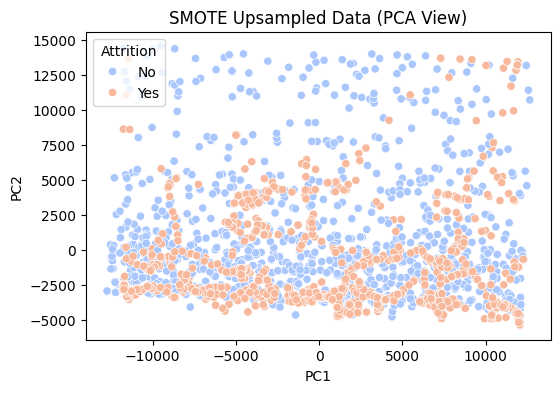

In [4]:
from sklearn.decomposition import PCA

X = df[[
    "MonthlyIncome", "Age", "EmployeeNumber", "TotalWorkingYears",
    "DailyRate", "MonthlyRate", "OverTime", "DistanceFromHome", "HourlyRate"
]]

if X["OverTime"].dtype == object:
    X["OverTime"] = X["OverTime"].map({"Yes": 1, "No": 0})

y = df["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_resampled)

plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train_resampled, palette='coolwarm')
plt.title("SMOTE Upsampled Data (PCA View)")
plt.xlabel("PC1")
plt.ylabel("PC2")
figures_path = "/Users/sidhaanthkapoor/Desktop/AI-Driven Employee Performance & Attrition Predictor/figures"
os.makedirs(figures_path, exist_ok=True)

plt.savefig(os.path.join(figures_path, 'UnsampledPCA.png'), dpi=300)



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.56      0.69       247
         Yes       0.21      0.60      0.31        47

    accuracy                           0.57       294
   macro avg       0.54      0.58      0.50       294
weighted avg       0.77      0.57      0.63       294



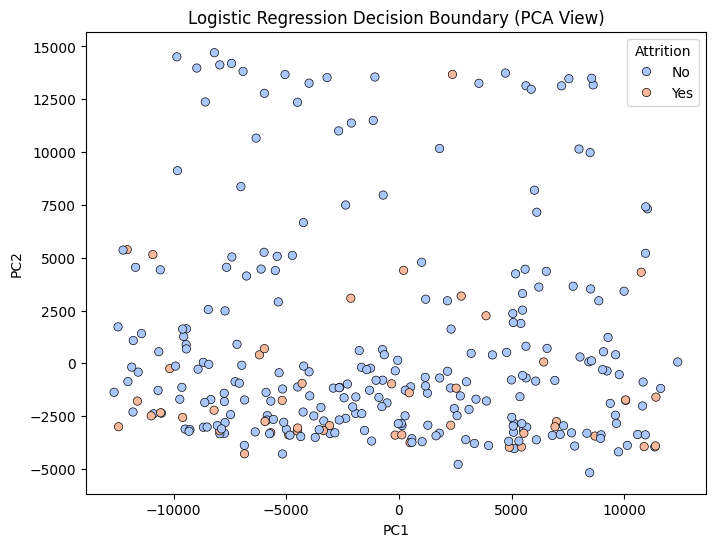

In [5]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test)

x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_original = pca.inverse_transform(grid_points)
Z = model.predict(grid_original)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_test, palette='coolwarm', edgecolor='k')
plt.title("Logistic Regression Decision Boundary (PCA View)")
plt.xlabel("PC1")
plt.ylabel("PC2")
figures_path = "/Users/sidhaanthkapoor/Desktop/AI-Driven Employee Performance & Attrition Predictor/figures"
os.makedirs(figures_path, exist_ok=True)

plt.savefig(os.path.join(figures_path, 'LogisticRegressionPCA.png'), dpi=300)


/var/folders/31/jzn_5wl15lz0z8ycp361q7nm0000gn/T/ipykernel_49390/1771565833.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["OverTime"] = X["OverTime"].map({"Yes": 1, "No": 0})


Decision Tree Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.82      0.84       247
         Yes       0.25      0.32      0.28        47

    accuracy                           0.74       294
   macro avg       0.56      0.57      0.56       294
weighted avg       0.77      0.74      0.75       294

Random Forest Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.96      0.91       247
         Yes       0.48      0.21      0.29        47

    accuracy                           0.84       294
   macro avg       0.67      0.58      0.60       294
weighted avg       0.80      0.84      0.81       294



/var/folders/31/jzn_5wl15lz0z8ycp361q7nm0000gn/T/ipykernel_49390/1771565833.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df, x='Importance', y='Feature', palette='viridis')


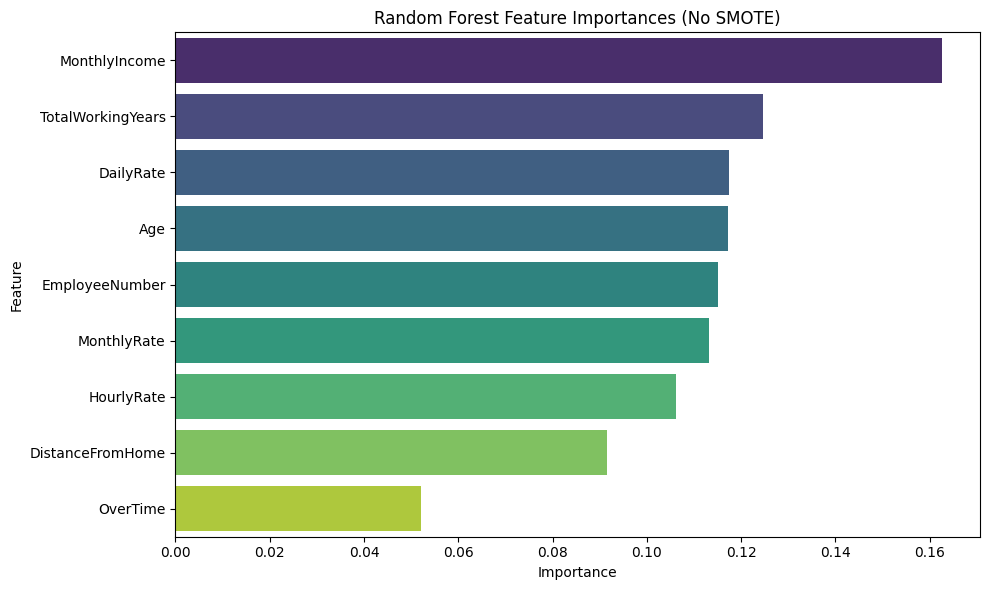

In [8]:
X = df[[
    "MonthlyIncome", "Age", "EmployeeNumber", "TotalWorkingYears",
    "DailyRate", "MonthlyRate", "OverTime", "DistanceFromHome", "HourlyRate"
]]

if X["OverTime"].dtype == object:
    X["OverTime"] = X["OverTime"].map({"Yes": 1, "No": 0})

y = df["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

importances = rf_model.feature_importances_
feature_names = X.columns

feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df, x='Importance', y='Feature', palette='viridis')
plt.title("Random Forest Feature Importances (No SMOTE)")
plt.tight_layout()
plt.show()

In [6]:

X = df[["MonthlyIncome", "Age", "EmployeeNumber", "TotalWorkingYears",
        "DailyRate", "MonthlyRate", "OverTime", "DistanceFromHome", "HourlyRate"]]
y = df["Attrition"].map({'Yes': 1, 'No': 0})

if X["OverTime"].dtype == 'object':
    X["OverTime"] = X["OverTime"].map({'Yes': 1, 'No': 0})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
y_probs = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost Model Performance on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['No Attrition', 'Yes Attrition']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

precision, recall, _ = precision_recall_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for XGBoost')
plt.tight_layout()
plt.savefig('xgboost_precision_recall_curve.png')
print("Precision-recall curve saved.")

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('xgboost_roc_curve.png')
print("ROC curve saved.")

/var/folders/31/jzn_5wl15lz0z8ycp361q7nm0000gn/T/ipykernel_90375/2515586622.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["OverTime"] = X["OverTime"].map({'Yes': 1, 'No': 0})


XGBoost Model Performance on Test Set:
Accuracy: 0.8469387755102041

Classification Report:
                precision    recall  f1-score   support

 No Attrition       0.88      0.96      0.92       255
Yes Attrition       0.29      0.10      0.15        39

     accuracy                           0.85       294
    macro avg       0.58      0.53      0.53       294
 weighted avg       0.80      0.85      0.81       294

Confusion Matrix:
 [[245  10]
 [ 35   4]]


NameError: name 'precision_recall_curve' is not defined

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_recall_curve,
    roc_curve,
    auc
)
import xgboost as xgb
import joblib

os.makedirs('models', exist_ok=True)
df = pd.read_csv("/Users/sidhaanthkapoor/Desktop/AI-Driven Employee Performance & Attrition Predictor/data/WA_Fn-UseC_-HR-Employee-Attrition.csv")

X = df[["MonthlyIncome", "Age", "EmployeeNumber", "TotalWorkingYears",
        "DailyRate", "MonthlyRate", "OverTime", "DistanceFromHome", "HourlyRate"]]
y = df["Attrition"].map({'Yes': 1, 'No': 0})

if X["OverTime"].dtype == 'object':
    X["OverTime"] = X["OverTime"].map({'Yes': 1, 'No': 0})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
y_probs = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost Model Performance on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['No Attrition', 'Yes Attrition']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

precision, recall, _ = precision_recall_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for XGBoost')
plt.tight_layout()
pr_path = os.path.join('models', 'xgboost_precision_recall_curve.png')
plt.savefig(pr_path)
print(f"Precision-recall curve saved as '{pr_path}'")

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.tight_layout()
roc_path = os.path.join('models', 'xgboost_roc_curve.png')
plt.savefig(roc_path)
print(f"ROC curve saved as '{roc_path}'")

model_path = os.path.join('models', 'xgboost_model.pkl')
joblib.dump(xgb_model, model_path)
print(f"XGBoost model saved as '{model_path}'")

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: '@rpath/libomp.dylib'\n  Referenced from: '/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/lib/libxgboost.dylib'\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)"]
